In [34]:
# Import necessary libraries

# Your code here
# Import necessary libraries
import operator
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures


In [35]:
# Read the datafile "covid.csv"
df = pd.read_csv("covid.csv")

# Take a quick look at the dataframe
df.head()


,age,sex,cough,fever,chills,sore_throat,headache,fatigue,Urgency
0,30.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,47.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,49.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,59.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0


In [36]:
# Check if there are any missing or Null values
# Check if there are any missing or null values
missing_values = df.isnull().any().any()

if missing_values:
    print("There are missing or null values in the DataFrame.")
else:
    print("There are no missing or null values in the DataFrame.")


There are missing or null values in the DataFrame.


In [40]:
print(type(df))


<class 'pandas.core.frame.DataFrame'>


In [5]:
### edTest(test_na) ###
# Find the number of rows with missing values
num_null= df.isnull().any(axis=1).sum()

print("Number of rows with missing values:", num_null)



Number of rows with missing values: 37


In [41]:
# kNN impute the missing data
# Use a k value of 5

# Your code here
import pandas as pd
from sklearn.impute import KNNImputer

# Create a KNN imputer object with k=5
imputer = KNNImputer(n_neighbors=5)

# Exclude 'Urgency' column from the imputation
columns_to_impute = [col for col in df.columns if col != 'Urgency']

# Impute missing values
df_imputed_array = imputer.fit_transform(df[columns_to_impute])

# Convert the imputed NumPy array back to a DataFrame
df_imputed = pd.DataFrame(df_imputed_array, columns=columns_to_impute)

# Concatenate the imputed DataFrame with the 'Urgency' column
df_imputed['Urgency'] = df['Urgency']






In [43]:
### edTest(test_impute) ###
# Replace the original dataframe with the imputed data, continue to use df for the dataframe

# Your code here
# Assign the imputed DataFrame back to df
df = df_imputed





## EDA

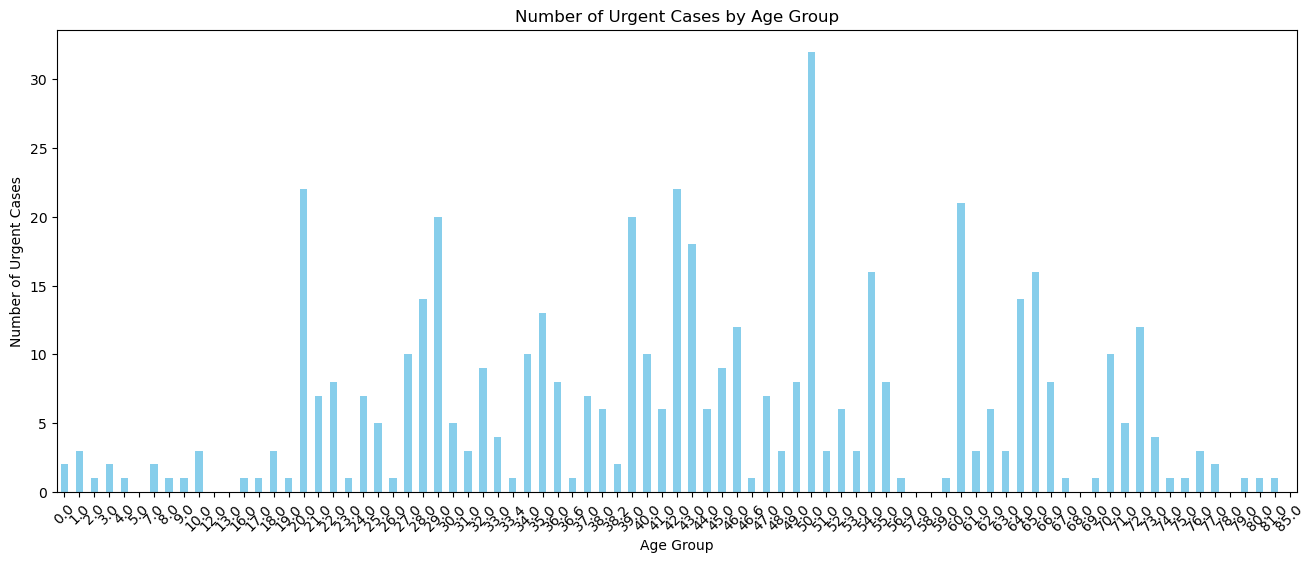

In [8]:
# Plot an appropriate graph to answer the following question
# Your code here
# Group the data by age group and count the number of urgent cases in each group
urgency_by_age = df.groupby('age')['Urgency'].sum()

# Plot a bar plot
urgency_by_age.plot(kind='bar', figsize=(16, 6), color='skyblue')

# Add labels and title
plt.title('Number of Urgent Cases by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Urgent Cases')
plt.xticks(rotation=45)

# Show the plot
plt.show()


### ⏸ Which age group has the most urgent need for a hospital bed?

#### A. 60 - 70 

#### B. 50 - 60 

#### C. 20 - 30

#### D. 40 - 50

In [9]:
### edTest(test_chow1) ###
# Submit an answer choice as a string below (eg. if you choose option A, put 'A')
answer1 = 'D'


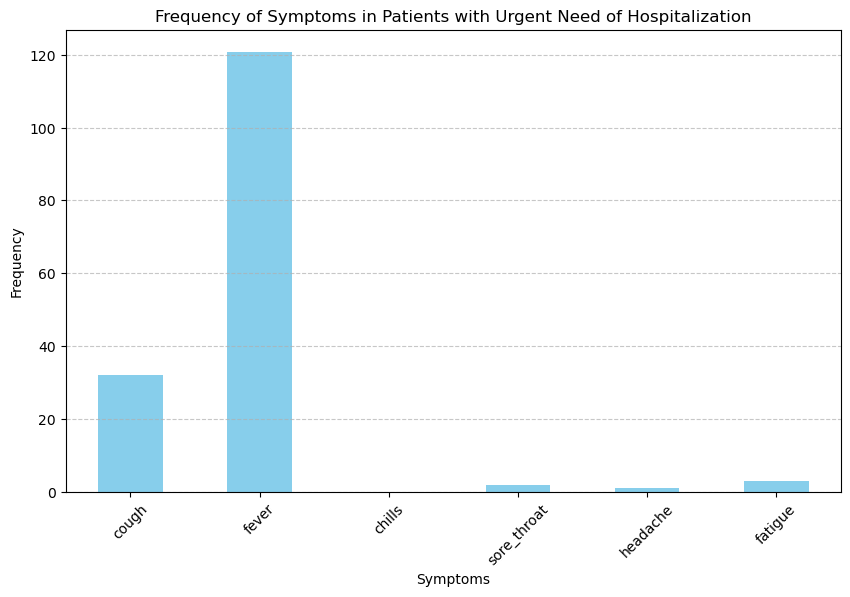

In [10]:
# Plot an appropriate graph to answer the following question    
# Your code here
import matplotlib.pyplot as plt

# Symptoms to consider
symptoms = ['cough', 'fever', 'chills', 'sore_throat', 'headache', 'fatigue']

# Counting the frequency of each symptom for patients with urgent need of hospitalization
urgent_symptom_counts = df[df['Urgency'] == 1][symptoms].sum()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
urgent_symptom_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Symptoms')
plt.ylabel('Frequency')
plt.title('Frequency of Symptoms in Patients with Urgent Need of Hospitalization')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


### ⏸ Among the following symptoms, which is the most common one for patients with urgent need of hospitalization?

#### A. Cough

#### B. Fever

#### C. Sore Throat

#### D. Fatigue

In [11]:
### edTest(test_chow2) ###
# Submit an answer choice as a string below (eg. if you choose option A, put 'A')
answer2 = 'B'


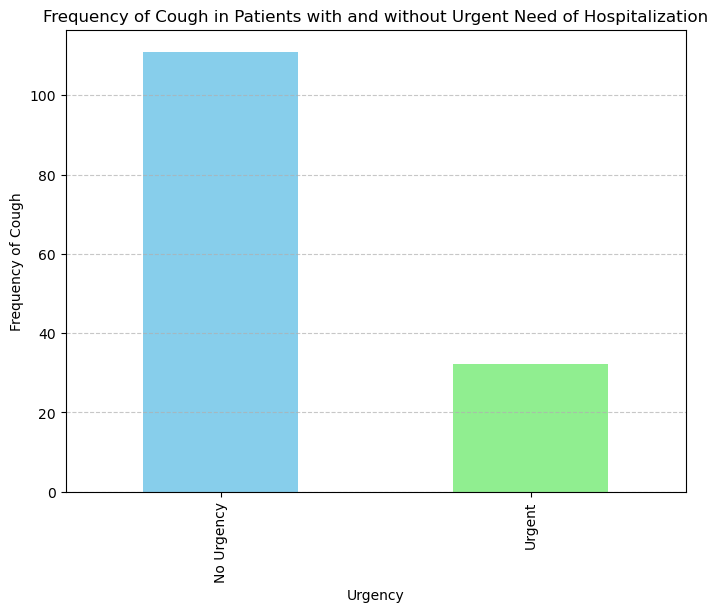

In [12]:
# Plot an appropriate graph to answer the following question    
# Your code here
# Counting the frequency of cough for patients with and without urgent need of hospitalization
urgency_cough_counts = df.groupby('Urgency')['cough'].sum()

# Plotting the bar chart
plt.figure(figsize=(8, 6))
urgency_cough_counts.plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.xlabel('Urgency')
plt.ylabel('Frequency of Cough')
plt.title('Frequency of Cough in Patients with and without Urgent Need of Hospitalization')
plt.xticks([0, 1], ['No Urgency', 'Urgent'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



### ⏸ As compared to patients with urgent need of hospitalization, patients with no urgency have cough as a more common symptom?

#### A. True

#### B. False

#### C. It is the same

#### D. Cannot say

In [13]:
### edTest(test_chow3) ###
# Submit an answer choice as a string below (eg. if you choose option A, put 'A')
answer3 = 'A'


### Train Test Split

In [17]:
### edTest(test_split) ###
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Urgency'])
y = df['Urgency']

# Splitting the data into train and test sets with 70% for training and 30% for testing
df_train, df_test = train_test_split(df, test_size=0.3, random_state=60)

# Printing the shapes of the train and test sets
print("Train set shape:", df_train.shape)
print("Test set shape:", df_test.shape)



Train set shape: (700, 9)
Test set shape: (301, 9)


In [44]:
# Save the train data into a csv called "covid_train.csv"
df_train.to_csv("covid_train.csv", index=False)

# Save the test data into a csv called "covid_test.csv"
df_test.to_csv("covid_test.csv", index=False)
